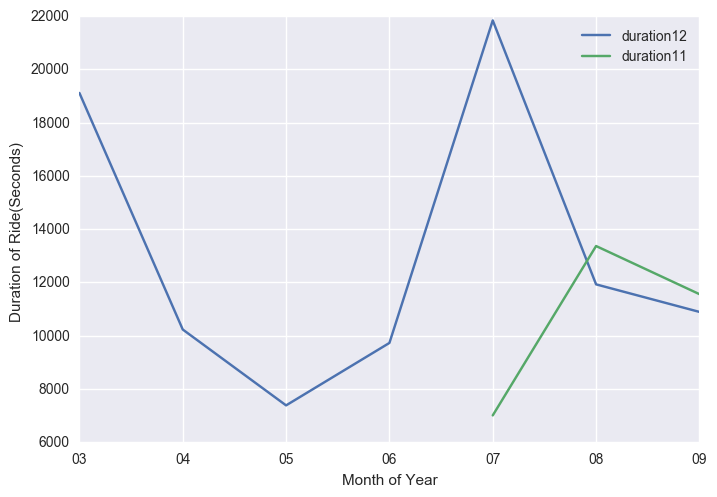

In [24]:
import os
import requests
import json
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from datetime import date,datetime
import calendar
import seaborn as sns
api_key = os.environ['api_key']
username=""
def get_df(url):
    resp = requests.get(url)
    data = resp.json().get('objects')
    return pd.DataFrame(data)
def get_data_year(start,end):
    trip_url = "http://hubwaydatachallenge.org/api/v1/trip/?format=json&username=\
{0}&api_key={1}&duration__gt=\
3600&start_station=33&start_date__gte={2}&end_date__lte={3}&limit=10000".format(username, api_key, start, end)
    df_trips = get_df(trip_url)
    df_trips.to_csv(os.path.join("..","data","analysis2_1.csv"))
    df_trips['month'] = map(lambda x:x[5:7],df_trips['end_date'].values)
    df_trips_gender=df_trips.groupby('month').mean()
    return df_trips_gender
meanduration_2012 = get_data_year('2012-01-01','2012-12-30')
meanduration_2011 = get_data_year('2011-01-01','2011-12-30')
res = meanduration_2012
res['duration12']=meanduration_2012['duration']
res['duration11'] = meanduration_2011['duration']
sns.set_style("darkgrid")
res[['duration12','duration11']].plot()
res[['duration12','duration11']].to_csv("analysis2_1.csv")
plt.xlabel('Month of Year')
plt.ylabel('Duration of Ride(Seconds) ')
plt.savefig(os.path.join("..",'extra','analysis2_1.png'),bbox_inches='tight')
plt.show()

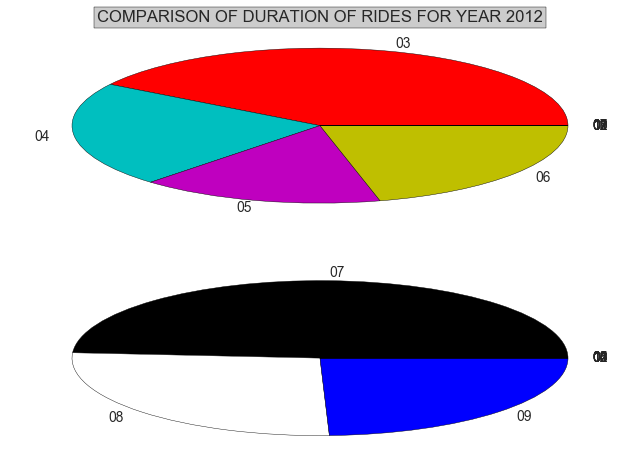

In [25]:
def get_data_year(year1,year2):
    trip_url = "http://hubwaydatachallenge.org/api/v1/trip/?format=json&username=\
{0}&api_key={1}&duration__gt=\
3600&start_station=33&start_date__gte={2}&end_date__lte={3}&limit=10000".format(username, api_key, year1, year2)
    df_trips = get_df(trip_url)
    df_trips.to_csv(os.path.join("..","data","analysis2_1{0}.csv".format(year1)))
    df_trips['month'] = map(lambda x:x[5:7],df_trips['end_date'].values)
    df_trips_gender=df_trips.groupby('month').mean()
    return df_trips_gender
meanduration_2012f = get_data_year('2012-01-01','2012-06-30')
meanduration_2012s = get_data_year('2012-07-01','2012-12-31')
fig = plt.figure()
fig.add_subplot(211)
plt.title('COMPARISON OF DURATION OF RIDES FOR YEAR 2012', bbox={'facecolor':'0.8', 'pad':2})
result=pd.DataFrame({'duration2012f':range(1,13),'duration2012s':range(1,13)},index=["0%s"%i if i<10 else "%s"%i for i in range(1,13)])

result['duration2012f'] = meanduration_2012f['duration']
result['duration2012s'] = meanduration_2012s['duration']
result.fillna(0,inplace=True)
result.to_csv("analysis2_2.csv")
plt.pie(result['duration2012f'],labels=result.index)
fig.add_subplot(212)
plt.pie(result['duration2012s'],labels=result.index)
plt.savefig(os.path.join("..",'extra','analysis2_2.png'),bbox_inches='tight')
plt.show()

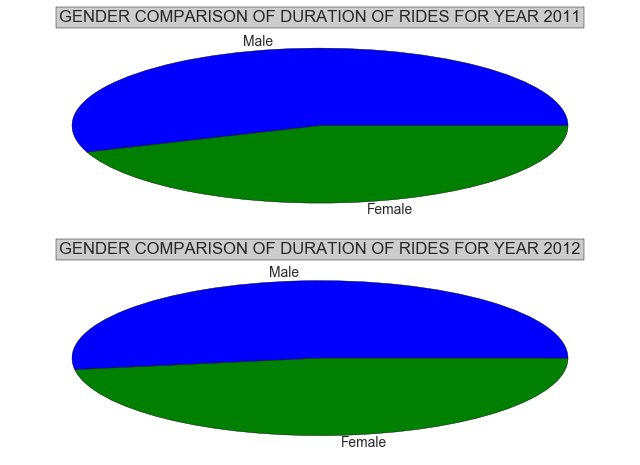

In [26]:
def get_data_year(year):
    trip_url = "http://hubwaydatachallenge.org/api/v1/trip/?format=json&username=\
{0}&api_key={1}&duration__gt=\
3600&start_station=33&start_date__gte={2}-01-01&end_date__lte={2}-12-31&limit=10000".format(username, api_key, year)
    df_trips = get_df(trip_url)
    df_trips.to_csv(os.path.join("..","data","analysis2_1{0}.csv".format(year)))
    return df_trips

fig = plt.figure()
counts = [211,212,222]
result=pd.DataFrame({'2011':range(2),'2012':range(2)},index=['Male','Female'])
for year,count in zip(['2011','2012'],counts):
    df_trips = get_data_year(year)
    fig.add_subplot(count)
    plt.title('GENDER COMPARISON OF DURATION OF RIDES FOR YEAR {0}'.format(year), bbox={'facecolor':'0.8', 'pad':2})
    gender_count = df_trips.groupby('gender').count()
    result[year]=gender_count['bike_nr']
    plt.pie(result[year],labels=result.index)
result.to_csv('analysis2_3.csv')
plt.savefig(os.path.join("..",'extra','analysis2_3.png'),bbox_inches='tight')
plt.show()